
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 1 - Curso 2022
## Introducción al procesamiento de audio.
### Procesamiento de audio en el dominio del tiempo - Percepción auditiva.

## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 12 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes mismos.


**Nombre de el/la estudiante:** 

### Como correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [2]:
# Al correr esta celda, se podrá acceder a archivos
# y carpetas en su cuenta de google drive.
# Puede ver la estructura de carpetas apretando en
# el icono de carpeta de la barra lateral izquierda.
from google.colab import drive
drive.mount('/content/drive')

## Ejercicio 1
**Digitalización. Sampling, aliasing. Cuantización. Dithering.**

Este ejercicio tiene como objetivo estudiar el muestreo y la cuantización de señales de audio. 

### Parte 1 - Sampling / Aliasing

1. Abrir el archivo *tones.wav* (muestreado a $44100Hz$), que contiene un tono de $1760Hz$ seguido de otro tono de $7040Hz$. Se sugiere utilizar las bibliotecas *scikits.audiolab* o [scipy.io](https://docs.scipy.org/doc/scipy/reference/io.html). Re-muestrear esta señal a $22050Hz$ y a $11025Hz$. Realizarlo de dos formas: descartando una de cada dos muestras y utilizando la función *decimate* de la biblioteca [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html).  Estudiar los resultados, escuchando los archivos de audio obtenidos y mediante espectrogramas. Se recomienda utilizar la función *specgram* de *matplotlib* o *spectrogram* de *scipy*.

1. Repetir para el archivo *chirp.wav*. Comentar los resultados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal
from scipy.io.wavfile import read
from IPython.display import Audio

# Ejemplo de abrir y escuchar un archivo de audio
# deben adaptar el path al directorio donde se
# encuentran las pistas en su Drive.
sr, data = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/tones.wav')
Audio(data, rate=sr)



### Parte 2 - Quantization / Dithering

1. Asumiendo el error de cuantización uniforme y con distribución $\mathcal{U}(-\frac{Q}{2},\frac{Q}{2})$, deduzca la expresión del *signal-to-error ratio* para un sistema de $n$ bits de largo de palabra. ¿Cuántos decibeles se reduce el error de cuantización al aumentar $1$ bit el largo de palabra?
1. Calcular la potencia del ruido de cuantización al agregar dithering en el sistema. Considerar dithering con las distribuciones de probabilidad de la figura 2.
---

<img src="https://drive.google.com/uc?id=1eLJhdlVPEl2r5tT2PkBeLCRcto5cWmbJ" alt="FIG 1">

`FIG 1: Señal sinusoidal de frecuencia \unit[2000]{Hz} y amplitud $2$.`

---

---
<img src="https://drive.google.com/uc?id=1RjvPvWYthAp4-new0PYVFeJn8eCvueSm" alt="FIG 2">

`FIG 2: Distribuciones de probabilidad de los tipos de dithering. La distribución gaussiana es $\mathcal{N}(0,\frac{Q^2}{4})$.`

---

3. Se desea analizar el efecto de la cuantización y el uso de dithering para una señal de baja amplitud. Se utilizará una señal sinusoidal de frecuencia $500Hz$ y amplitud $2$, muestreada a $f_s=44100Hz$ (figura 1). Para simular que esta señal tiene baja amplitud con respecto al rango de la cuantización, considerar el paso de cuantización igual a $1$.
	
	Se pide:
	1. Generar la señal sinusoidal (unos pocos segundos).
	1. Sumar a la señal tres tipos de dithering; uniforme, triangular y gaussiano, utilizando las distribuciones de probabilidad de la figura 2.
	1. Cuantizar la señal sin dithering, y las señales con los distintos tipos de dithering.
	1. Calcular la potencia del error de cuantización y graficar el espectro de la señal cuantizada en cada caso.
	1. Analizar los resultados de manera gráfica y perceptual (auditiva). Comparar.


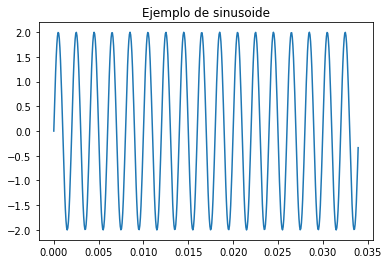

In [ ]:
# parametros
amplitud = 2
frecuencia = 500

# vector de tiempos
t = np.arange(0, 3, 1/44100)
# otra opcion
t = np.linspace(0, 3, 44100)
sinusoide = amplitud * np.sin(2*np.pi * frecuencia * t)

# grafica de parte de la sinusoide
plt.plot(t[:500], sinusoide[:500])
plt.title("Ejemplo de sinusoide")
plt.show()

# reproducir audio
Audio(sinusoide, rate=44100)

## Ejercicio 2
**Short-time average energy, magnitude and zero-crossing rate.**

En este ejercicio se calculan características en tiempo corto de una señal de audio; en particular, energía, magnitud y tasa de cruces por cero.

### Parte 1

La energía y la magnitud en tiempo corto de una señal $x[n]$, $E_n$ y $M_n$ respectivamente, se definen como:

\begin{equation*}
\begin{array}{rcl}
	E_n & = & \displaystyle\sum_{m=-\infty}^{\infty}x^2[m]w[n-m] \\
	M_n & = & \displaystyle\sum_{m=-\infty}^{\infty}|x[m]|w[n-m]
\end{array}
\end{equation*}

donde $w[n]$ es una ventana de análisis temporal. Se pide:

1. Para la ventana $w_a[n]$, encontrar las expresiones en recurrencia para calcular $E_n$ y $M_n$ en función de $E_{n-1}$ y $M_{n-1}$ respectivamente.

	\begin{equation*}
		w_a[n]=
			\begin{cases}
				a^n, & n \geq 0 \\
				0, & n < 0.
		\end{cases}	
	\end{equation*}

2. Para la ventana rectangular $w_R[n]$, escribir funciones que implementen el cálculo de $E_n$ y $M_n$.

	\begin{equation*}
		w_R[n]=
			\begin{cases}
				1, & 0 \leq n \leq N-1 \\
				0, & \text{en otro caso}.
			\end{cases}
	\end{equation*}

3. Utilizando estas funciones, calcular y graficar $E_n$ y $M_n$ para la señal de audio del archivo _voice.wav_. ¿Es posible determinar el inicio y final de las palabras aisladas utilizando estas medidas?

### Parte 2

La tasa de cruces por cero es una forma simple de estimar el contenido espectral de una señal, sobre todo para señales de banda angosta. Matemáticamente puede definirse como

\begin{equation*}
	Z_n = \displaystyle\sum_{m=-\infty}^{\infty}|\text{sign}(x[m])-\text{sign}(x[m-1])\;|w[n-m]
\end{equation*}

donde \; 
$\text{sign}(x[m]) = \begin{cases} 1, & x[m]\geq0 \\ -1, & x[m]<0. \end{cases}$ \; 
y \; 
$w[n] = \begin{cases} \frac{1}{2N}, & 0\leq n\leq N-1 \\ 0, & \text{en otro caso} \end{cases}$ 

Se pide:
1. Demostrar que $Z_n$ puede expresarse de forma recursiva como

  \begin{equation*}
        Z_n = Z_{n-1} + \frac{1}{2N}\left\{ |\text{sign}(x[n]) - \text{sign}(x[n-1])| - |\text{sign}(x[n-N]) - \text{sign}(x[n-N-1])| \right\}.
  \end{equation*}

1. Escribir una función que calcule la tasa de cruces por cero para $N$ muestras de una señal.

3. Calcular y graficar la tasa de cruces por cero para la señal de audio del archivo *voice.wav*, cada $10ms$. ¿Esta medida aporta información para encontrar los inicios y finales de las palabras?

### Parte 3

El problema de encontrar el inicio y final de palabras es importante en muchas aplicaciones de procesamiento de señales de voz. Una manera simple de abordar este problema es utilizando la energía en tiempo corto y la tasa de cruces por cero en tiempo corto.

Se pide:

1. Implementar un algoritmo que encuentre automáticamente el inicio y final de las palabras, utilizando las funciones escritas en las partes anteriores (energía y tasa de cruces por cero). 
1. Probar el algoritmo con las señales de los archivos *voice.wav*, *voice2.wav* y *fox.wav*.
1. Comentar los resultados obtenidos, incluyendo las posibles limitantes del abordaje.

## Ejercicio 3
**Short-time autocorrelation function, short-time AMDF and pitch estimation.**

En este ejercicio se presenta el cálculo de la función de autocorrelación, y su aplicación en el cálculo de la frecuencia fundamental de una señal de audio.

### Parte 1

La función de autocorrelación en tiempo corto está definida como
\begin{equation*}
	R_n[k] = \displaystyle\sum_{m=-\infty}^{\infty}x[m]w[n-m]x[m+k]w[n-k-m].
\end{equation*}

1. Demostrar que $R_n[k]$ es una función par en $k$, o sea, que $R_n[k] = R_n[-k]$.
1. Demostrar que $R_n[k]$ puede escribirse como
	\begin{equation*}
		R_n[k] = \displaystyle\sum_{m=-\infty}^{\infty}x[m]x[m-k]h_k[n-m]
	\end{equation*}
	donde $h_k[n] = w[n]w[n+k]$.

### Parte 2

Se utilizará ahora la función de autocorrelación para implementar la detección de frecuencia fundamental de señales de audio. Se sugiere el siguiente procedimiento:
1. Se toman intervalos de $30ms$ de largo, cada $10ms$ (i.e. $20ms$ de superposición).
1. Para cada intervalo:
	1. Se calculan los primeros $250$ valores de la función de autocorrelación (Se sugiere una implementación vectorial).
	1. Se busca el índice $k_f$ del primer máximo local que supere el $60\%$ del valor en cero. Si existe, hay un componente periódico suficientemente notorio, cuya frecuencia es $f = \frac{f_s}{k_f}$.
	1. Si no se encuentra ningún máximo local bajo esa condición, se asigna $f = 0$, considerándose que no hay un componente periódico relevante en ese intervalo de tiempo.
	1. Se obtiene un vector con valores de frecuencia cada $10ms$ comenzando en $t=0.015s$.

Realizar este procedimiento utilizando la señal de audio del archivo *LP-mem-6-a.wav*. Comparar los resultados con la referencia contenida en el archivo *LP-mem-6-a.txt*.

